In [1]:
D.<x> = PolynomialRing(QQ)
R.<x> = PolynomialRing(QQ)
CF=ComplexField(1000)
f = x^2+1;
f.roots()
S = PowerSeriesRing(QQ,'x', default_prec=300)
L=LaurentSeriesRing(QQ,'x', default_prec=300)
#S.<x,y>=PowerSeriesRing(QQ,default_prec=300)
# Using "R = PolynomialRing(QQ,'x')" produces an error.
# Yet using S as defined here is fine (see definition of Fraleigh4 below)
# But S = PowerSeriesRing(QQ,'x','y') also produces an error.
def pochhammer(x,n):
    return product ([x+k for k in [0..n-1]])
def cRaleigh2(alpha,beta,nu):
    pchhmrA = pochhammer(alpha,nu)
    pchhmrB = pochhammer(beta,nu)
    fnu=factorial(nu)
    answer = D(pchhmrA*pchhmrB/fnu^2)
    return answer
def term(alpha,beta,p):
    return D(1/(alpha + p) + 1/(beta + p) - 2/(1 + p))
def eRaleigh(alpha, beta, nu):
    return D(sum([term(alpha, beta, p) for p in [0..nu - 1]]))
def FstarRaleigh2(alpha,beta,u,terms):
    fsr = sum([cRaleigh2(alpha, beta, nu)*eRaleigh(alpha,beta,nu)*u^nu for nu in [1..terms]])
    return D(fsr)
def Fraleigh2(alpha,beta,u,terms): 
    return D(sum([cRaleigh2(alpha,beta,nu)*u^nu for nu in [0..terms]]))
def FstarRaleigh3(n,m,x):
    alpha = (1/2-1/m)/2
    beta = (1/2+1/m)/2
    fsr2 = FstarRaleigh2(alpha,beta,x,n)
    return D(fsr2)
def Fraleigh4(n,m,x):
    alpha = (1/2-1/m)/2
    beta = (1/2+1/m)/2
    fr2 = Fraleigh2(alpha,beta,x,n)
    return D(fr2)
def exNo3c(n,m):
    a1 = S(x)*exp(S(FstarRaleigh3(n,m,x)/Fraleigh4(n,m,x))).O(2*n)
    # S(x) instead of x in df of a1 to avoid an error message
    # after use of the stripQuotationMarks command below.
    a2 = S(a1).O(n+1)
    return a2 # applying S to argument of exp is key.
def J(n,m):
    exn = exNo3c(n+2,m)
    jnm = 1/exn.reverse()
    return jnm.O(n+1) # Jtest is faster than J, and they agree.
def normalJ(n,m):
    f = J(n,m)
    return f.truncate(n+1)
def Jcoefficient(n,m):
    f = J(n+2,m)
    f1 = f.truncate(n+1)
    f1=f1.list()
    f1=Set(f1)
    g1 = f.truncate(n)
    g1 = g1.list()
    g1 = set(g1)
    h = f1.difference(g1)
    h = h.list()
    return h[0]
def xjNew(n,m):
    def xjNewStep(n,m):
        f=J(n,m)
        fl=f.list()
        rt=0
        for i in [0..len(fl)-1]:
            rt=rt+fl[i]*x**i*(m**3*2**6)**i
        return rt
    return xjNewStep(n-1,m)
def j(n,m):return L(xjNew(n,m)/x)
def polynomialCoefficient(n,poly):
    return poly.list()[n]
def leadingCoefficient(polynomial):
    dg=polynomial.degree()
    return polynomialCoefficient(dg,polynomial)
def factorpairToFactor(factorpair):
    (monomial,exponent)=factorpair
    return monomial^exponent
def numericalfactor(polynomial):
    fp=polynomial.factor()
    lst=[factorpairToFactor(factorpair) for factorpair in fp]
    return polynomial/product(lst)
def firstfactor(polynomial):
    fp=polynomial.factor()
    fp=FiniteEnumeratedSet(fp)
    return factorpairToFactor(fp.first())
def lastfactor(polynomial):
    fp=polynomial.factor()
    fp=FiniteEnumeratedSet(fp)
    return factorpairToFactor(fp.last())
def reduced(polynomial):
    return numericalfactor(polynomial)*lastfactor(polynomial)
def stripQuotationMarks(string):
    var('x')
    return sage_eval(string,locals={'x':x})
def quotientFOvrG(f,g) : 
    return (f.maxima_methods().divide(g))[0]
def remainderFOvrG(f,g) : 
    return (f.maxima_methods().divide(g))[1]
def factor(polynomial):
    fp=polynomial.factor()
    return fp
def numberOfFactors(polynomial):
    fp=polynomial.factor()
    return len(fp)
def factorK(polynomial,k):
    fp=factor(h)
    return fp[k-1]
def factorList(polynomial):
    answer=[]
    nf=numberOfFactors(polynomial)
    for k in [1..nf]:
        answer=answer+[factorK(polynomial,k)]
    return answer
def polynomialExponentList(polynomial):
    pel=[]
    fp=polynomial.factor()
    lf=len(fp)
    for n in [0..lf-1]:
        part = fp[n]
        (base,exponent) = part
        pel=pel+[exponent]
    return pel
def polynomialFactorBaseList(polynomial):
    fbl=[]
    fp=polynomial.factor()
    lf=len(fp)
    for n in [0..lf-1]:
        part = fp[n]
        (base,exponent) = part
        fbl=fbl+[base]
    return fbl
def absoluteValue(x,precision):
    return N(sqrt(norm(x)),digits=precision)
def substituteNumberForXInExpression(number,x,Xexpression):
    var('x')
    return sage_eval(str(Xexpression),locals={'x':number})
print("ok1")

ok1


In [ ]:
import time
import pickle
wfile = open('/Users/barrybrent/21mar21no6.txt','w') # star series produced w. a different dictionary
#in another notebook.
data=[]
for m in [3..203]:
    start=time.time()
    ds=deltaStar6(50,m)
    data=data+[[m,ds]]
    finish=time.time()
    print([m,ds.degree(),finish-start])
s = pickle.dumps(str(data))
wfile.write(s)
wfile.close() # snip printing

In [ ]:
# interpolating polynomials
import pickle
rfile = open('/Users/barrybrent/21mar21no6.txt','r') # star series
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
polydata=[]
import time
wfile = open('/Users/barrybrent/22mar21no2.txt','w') # star polynomials
for qpower in [1..50]:
    start = time.time()
    data=[]
    for k in [0..len(s)-1]:
        m = s[k][0]
        poly=s[k][1] 
        cf=polynomialCoefficient(qpower,poly)
        data=data+[[m,cf]]
    rl=R.lagrange_polynomial(data)
    polydata=polydata+[[qpower,rl]] 
    finish = time.time()
    print([qpower,rl.degree(),finish-start])
t = pickle.dumps(str(polydata))
wfile.write(t)
wfile.close() # snip printing

In [3]:
import pickle
rfile = open('/Users/barrybrent/22mar21no2.txt','r')  # interpolating polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
len(s)

50

[0, 0.000000, 12.7811]
[1, 3.00000, 9.78111]
[2, 4.00001, 8.78110]
[3, 4.99983, 7.78128]
[4, 6.00148, 6.77963]
[5, 6.99663, 5.78448]
[6, 7.98434, 4.79677]
[7, 9.13352, 3.64759]
[8, 9.75182, 3.02929]
[9, 11.2978, 1.48326]
[10, 11.8262, 0.954944]
[11, 13.0630, -0.281847]
[12, 21.5362, -8.75506]
[13, 33.7763, -20.9952]
[14, 74.2012, -61.4201]
[15, 4.73724, 8.04387]
[16, 4.73724, 8.04387]
[17, 5.24767, 7.53344]
[18, 5.24767, 7.53344]
[19, 4.27317, 8.50794]
[20, 4.27317, 8.50794]
[21, 3.85190, 8.92921]
[22, 3.85190, 8.92921]
[23, 5.81434, 6.96677]
[24, 5.81434, 6.96677]
[25, 3.47892, 9.30219]
[26, 3.47892, 9.30219]
[27, 6.44439, 6.33672]
[28, 6.44439, 6.33672]
[29, 3.15315, 9.62796]
[30, 3.15315, 9.62796]
[31, 2.86539, 9.91572]
[32, 2.86539, 9.91572]
[33, 2.64126, 10.1399]
[34, 2.64126, 10.1399]
[35, 2.13929, 10.6418]
[36, 2.13929, 10.6418]
[37, 7.13981, 5.64130]
[38, 7.13981, 5.64130]
[39, 2.22964, 10.5515]
[40, 2.22964, 10.5515]
[41, 2.45366, 10.3275]
[42, 2.45366, 10.3275]
[43, 1.93414, 

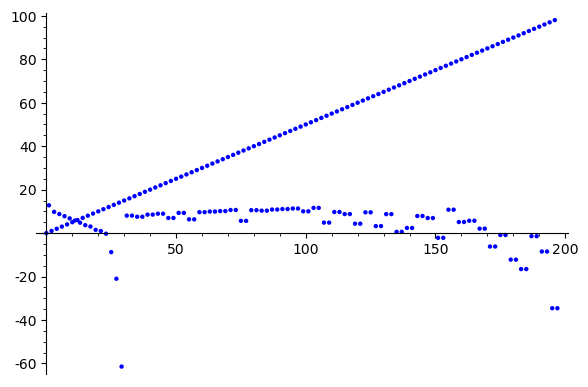

In [27]:
import pickle
rfile = open('/Users/barrybrent/22mar21no2.txt','r')  # interpolating polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
diffs=[]
for k in [49..49]:
    roots=[]
    abroots=[]
    n=s[k][0]
    nl=n/ln(n)
    nl=absoluteValue(nl,6)
    poly=R(s[k][1])
    pr=poly.roots(CC)
    lpr=len(pr)
    for j in [0..lpr-1]:
        rootpair=pr[j]
        (root,mult)=rootpair
        abr=absoluteValue(root,6)
        diff=nl-abr
        diffs=diffs+[j,diff]
        print[j,abr,diff]
        roots=roots+[j,root,abr,diff]
show(list_plot(diffs,color='blue'))

polynomial # 50
[1, 0.00000, 12.781110931766572710]
[2, 3.0000, 12.781110931766572710]
[3, 4.0000, 12.781110931766572710]
[4, 4.9998, 12.781110931766572710]
[5, 6.0015, 12.781110931766572710]
[6, 6.9966, 12.781110931766572710]
[7, 7.9843, 12.781110931766572710]
[8, 9.1335, 12.781110931766572710]
[9, 9.7518, 12.781110931766572710]
[10, 11.298, 12.781110931766572710]
[11, 11.826, 12.781110931766572710]
[12, 13.063, 12.781110931766572710]
[13, 21.536, 12.781110931766572710]
[14, 33.776, 12.781110931766572710]
[15, 74.201, 12.781110931766572710]
[16, 4.7372, 12.781110931766572710]
[17, 4.7372, 12.781110931766572710]
[18, 5.2477, 12.781110931766572710]
[19, 5.2477, 12.781110931766572710]
[20, 4.2732, 12.781110931766572710]
[21, 4.2732, 12.781110931766572710]
[22, 3.8519, 12.781110931766572710]
[23, 3.8519, 12.781110931766572710]
[24, 5.8143, 12.781110931766572710]
[25, 5.8143, 12.781110931766572710]
[26, 3.4789, 12.781110931766572710]
[27, 3.4789, 12.781110931766572710]
[28, 6.4444, 12.7811

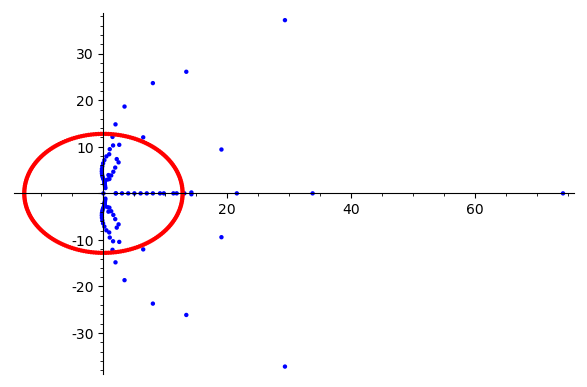

degree:  147
root count:  0


In [25]:
import pickle
rfile = open('/Users/barrybrent/22mar21no2.txt','r')  # interpolating polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
lengths=[]
for k in [49..49]:
    points=[]
    n=s[k][0]
    nl=n/ln(n)
    nl=absoluteValue(nl,20)
    print "polynomial #",n
    poly=R(s[k][1])
    pr=poly.roots(CC)
    lpr=len(pr)
    roots=[]
    rootcount=0
    for j in [0..lpr-1]:
        rootpair=pr[j]
        (root,mult)=rootpair
        print [j+1,absoluteValue(root,5),nl]
        roots=roots+[root]
    rootplot=list_plot(roots,color='blue')
    radius=n/ln(n)
    circlepoints=[]
    for a in [0..199]:
        theta=(a/200)*(2*pi)
        point=[radius*cos(theta),radius*sin(theta)]
        circlepoints=circlepoints+[point]
    circle=list_plot(circlepoints,color='red')
    show(rootplot+circle)
    print "degree: ",poly.degree()
    print "root count: ",rootcount 

In [109]:
N(ln(120),digits=5)

4.7875

[0, 0.000000, 50.0000]
[1, 3.00000, 47.0000]
[2, 4.00001, 46.0000]
[3, 4.99983, 45.0002]
[4, 6.00148, 43.9985]
[5, 6.99663, 43.0034]
[6, 7.98434, 42.0157]
[7, 9.13352, 40.8665]
[8, 9.75182, 40.2482]
[9, 11.2978, 38.7022]
[10, 11.8262, 38.1738]
[11, 13.0630, 36.9370]
[12, 21.5362, 28.4638]
[13, 33.7763, 16.2237]
[14, 74.2012, -24.2012]
[15, 4.73724, 45.2628]
[16, 4.73724, 45.2628]
[17, 5.24767, 44.7523]
[18, 5.24767, 44.7523]
[19, 4.27317, 45.7268]
[20, 4.27317, 45.7268]
[21, 3.85190, 46.1481]
[22, 3.85190, 46.1481]
[23, 5.81434, 44.1857]
[24, 5.81434, 44.1857]
[25, 3.47892, 46.5211]
[26, 3.47892, 46.5211]
[27, 6.44439, 43.5556]
[28, 6.44439, 43.5556]
[29, 3.15315, 46.8469]
[30, 3.15315, 46.8469]
[31, 2.86539, 47.1346]
[32, 2.86539, 47.1346]
[33, 2.64126, 47.3587]
[34, 2.64126, 47.3587]
[35, 2.13929, 47.8607]
[36, 2.13929, 47.8607]
[37, 7.13981, 42.8602]
[38, 7.13981, 42.8602]
[39, 2.22964, 47.7704]
[40, 2.22964, 47.7704]
[41, 2.45366, 47.5463]
[42, 2.45366, 47.5463]
[43, 1.93414, 48.06

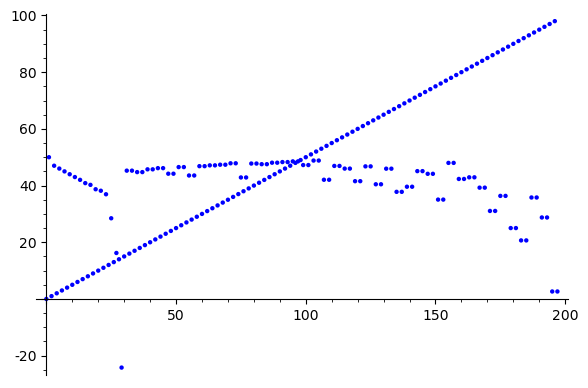

[50, 14, 74.2011716623359, 74.2012, -24.2012, 2.32750876950220e266]


In [36]:
rfile = open('/Users/barrybrent/22mar21no2.txt','r')  # interpolating polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
diffs=[]
no=[]
for k in [49..49]:
    roots=[]
    abroots=[]
    n=s[k][0]
    nl=R(n)
    poly=R(s[k][1])
    pr=poly.roots(CC)
    lpr=len(pr)
    for j in [0..lpr-1]:
        rootpair=pr[j]
        (root,mult)=rootpair
        abr=absoluteValue(root,6)
        diff=nl-abr
        if diff<0:
            value=substituteNumberForXInExpression(root,x,poly)
            no=no+[nl,j,root,abr,diff,value]
        diffs=diffs+[j,diff]
        print[j,abr,diff]
        roots=roots+[j,root,abr,diff]
show(list_plot(diffs,color='blue'))
print no


In [37]:
poly

-126008*x^147 + 4776938760261161444929696/83415280583710075*x^146 - 109736892298729022727579450943790319594098659578836449028038703776/8534731153737538931316282977169970513433938142811931875*x^145 + 67649187187073665340744765267141657247003017246655930881102373017843473012736/35446742062734686046366555294502845703825112634227001311712028125*x^144 - 167368301230120788436287560937134291843805086274439096540880349997484532678722874331283285746688/793889795936373948813029298527402305957412621003965084940809113601322433977015625*x^143 + 73459452652149836357016430031418688149552182361824814043028164424138137258734785842697631501162213376/3973418428661551613809211639129648541316850168124845250128749613574618782054963203125*x^142 - 2161642624559371931111143814104494132686615669294465717537617165763390156919242682853168278476391693798998429696/1612454541769607868328319768005916522059450200051061541517074182828309545666331349720253515625*x^141 + 15517152826388954182334281064037183088189515750269

polynomial # 50
[0, 0.00000, 50]
[1, 3.0000, 50]
[2, 4.0000, 50]
[3, 4.9998, 50]
[4, 6.0015, 50]
[5, 6.9966, 50]
[6, 7.9843, 50]
[7, 9.1335, 50]
[8, 9.7518, 50]
[9, 11.298, 50]
[10, 11.826, 50]
[11, 13.063, 50]
[12, 21.536, 50]
[13, 33.776, 50]
[14, 74.201, 50]
[15, 4.7372, 50]
[16, 4.7372, 50]
[17, 5.2477, 50]
[18, 5.2477, 50]
[19, 4.2732, 50]
[20, 4.2732, 50]
[21, 3.8519, 50]
[22, 3.8519, 50]
[23, 5.8143, 50]
[24, 5.8143, 50]
[25, 3.4789, 50]
[26, 3.4789, 50]
[27, 6.4444, 50]
[28, 6.4444, 50]
[29, 3.1531, 50]
[30, 3.1531, 50]
[31, 2.8654, 50]
[32, 2.8654, 50]
[33, 2.6413, 50]
[34, 2.6413, 50]
[35, 2.1393, 50]
[36, 2.1393, 50]
[37, 7.1398, 50]
[38, 7.1398, 50]
[39, 2.2296, 50]
[40, 2.2296, 50]
[41, 2.4537, 50]
[42, 2.4537, 50]
[43, 1.9341, 50]
[44, 1.9341, 50]
[45, 1.7072, 50]
[46, 1.7072, 50]
[47, 1.4627, 50]
[48, 1.4627, 50]
[49, 2.7577, 50]
[50, 2.7577, 50]
[51, 1.1748, 50]
[52, 1.1748, 50]
[53, 7.9526, 50]
[54, 7.9526, 50]
[55, 3.0702, 50]
[56, 3.0702, 50]
[57, 4.0124, 50]
[58, 4.

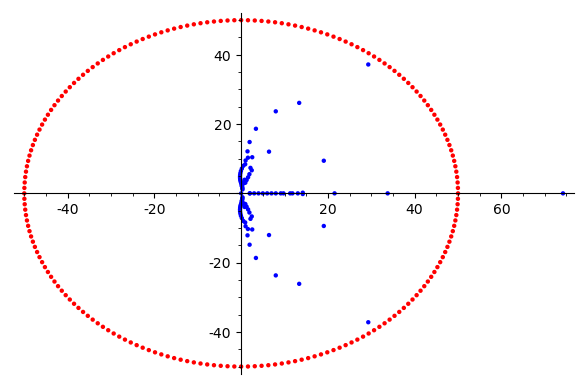

degree:  147
root count:  0


In [40]:
import pickle
rfile = open('/Users/barrybrent/22mar21no2.txt','r')  # interpolating polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
lengths=[]
for k in [49..49]:
    points=[]
    n=s[k][0]
    nl=R(n)
    print "polynomial #",n
    poly=R(s[k][1])
    pr=poly.roots(CC)
    lpr=len(pr)
    roots=[]
    rootcount=0
    for j in [0..lpr-1]:
        rootpair=pr[j]
        (root,mult)=rootpair
        print [j,absoluteValue(root,5),nl]
        roots=roots+[root]
    rootplot=list_plot(roots,color='blue')
    circlepoints=[]
    for a in [0..199]:
        theta=(a/200)*(2*pi)
        point=[nl*cos(theta),nl*sin(theta)]
        circlepoints=circlepoints+[point]
    circle=list_plot(circlepoints,color='red')
    show(rootplot+circle)
    print "degree: ",poly.degree()
    print "root count: ",rootcount 

polynomial # 1


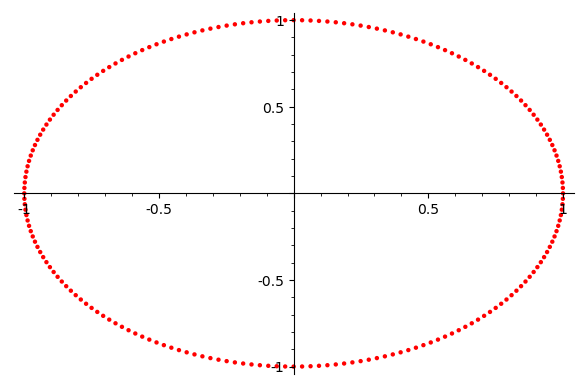

polynomial  1  degree:  0  good-root count:  0   root count:  0
polynomial # 2


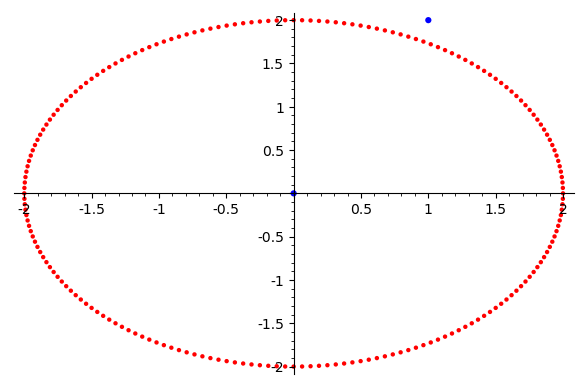

polynomial  2  degree:  3  good-root count:  1   root count:  3
polynomial # 3


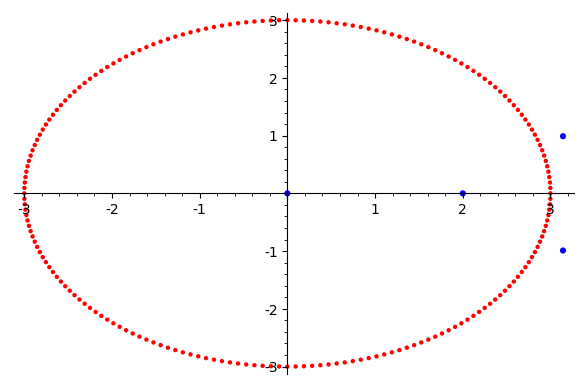

polynomial  3  degree:  6  good-root count:  4   root count:  6
polynomial # 4


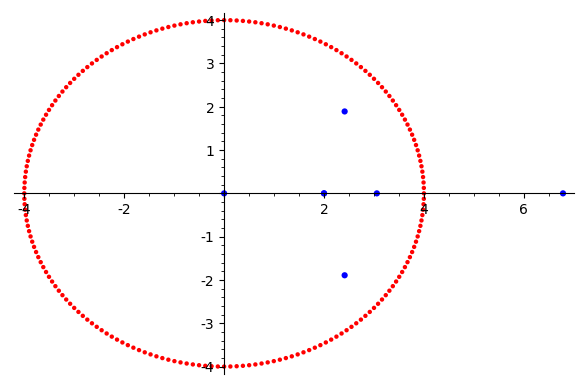

polynomial  4  degree:  9  good-root count:  8   root count:  9
polynomial # 5


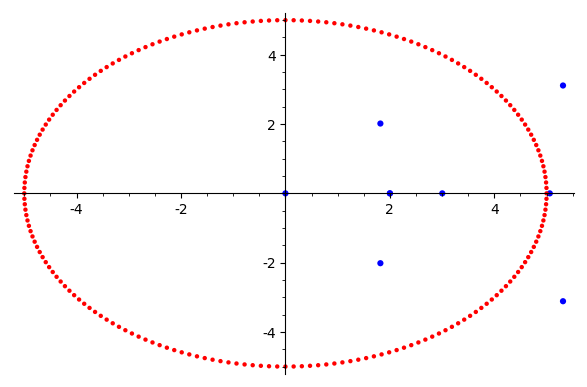

polynomial  5  degree:  12  good-root count:  9   root count:  12
polynomial # 6


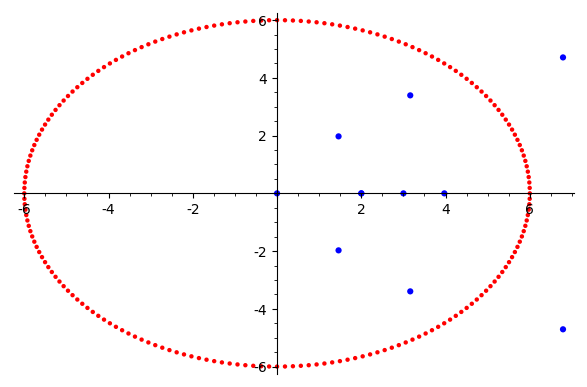

polynomial  6  degree:  15  good-root count:  13   root count:  15
polynomial # 7


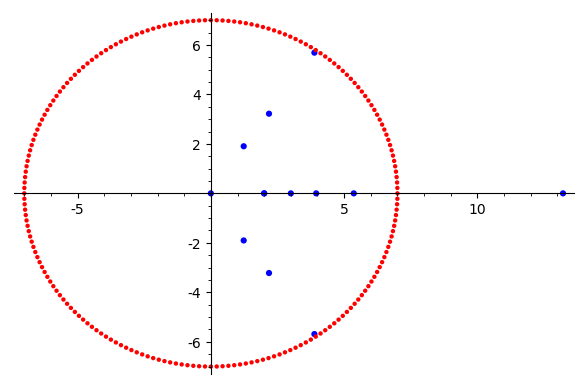

polynomial  7  degree:  18  good-root count:  17   root count:  18
polynomial # 8


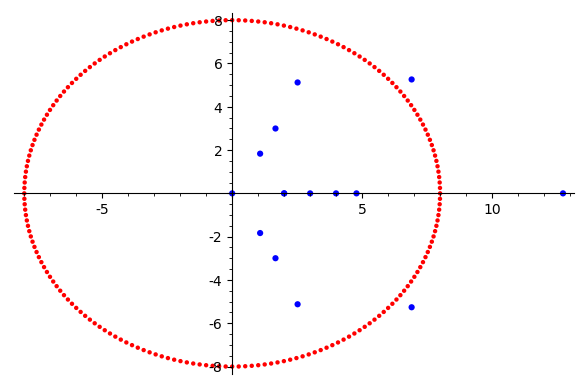

polynomial  8  degree:  21  good-root count:  18   root count:  21
polynomial # 9


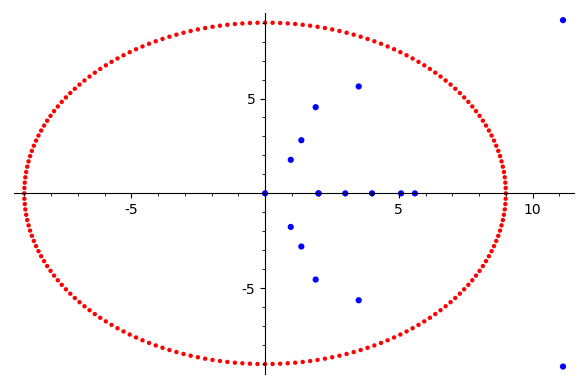

polynomial  9  degree:  24  good-root count:  22   root count:  24
polynomial # 10


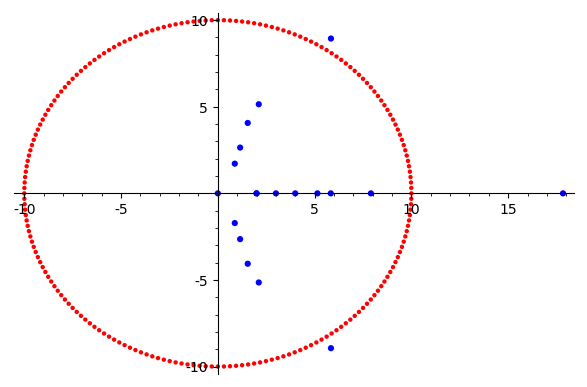

polynomial  10  degree:  27  good-root count:  24   root count:  27
polynomial # 11


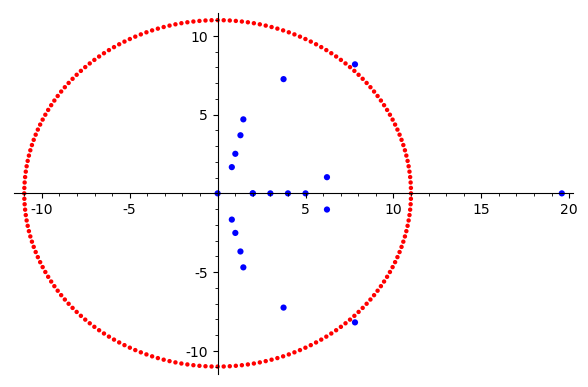

polynomial  11  degree:  30  good-root count:  27   root count:  30
polynomial # 12


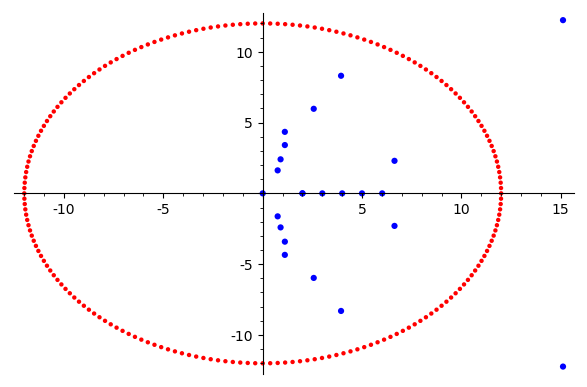

polynomial  12  degree:  33  good-root count:  31   root count:  33
polynomial # 13


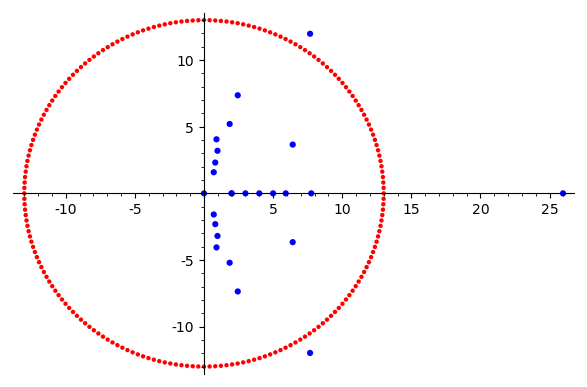

polynomial  13  degree:  36  good-root count:  33   root count:  36
polynomial # 14


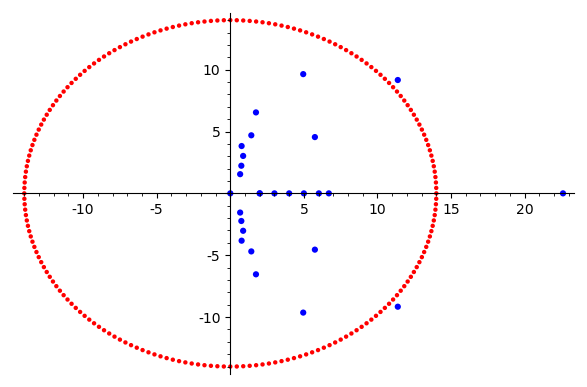

polynomial  14  degree:  39  good-root count:  36   root count:  39
polynomial # 15


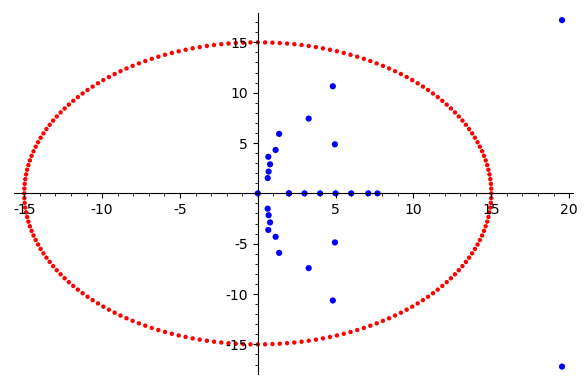

polynomial  15  degree:  42  good-root count:  40   root count:  42
polynomial # 16


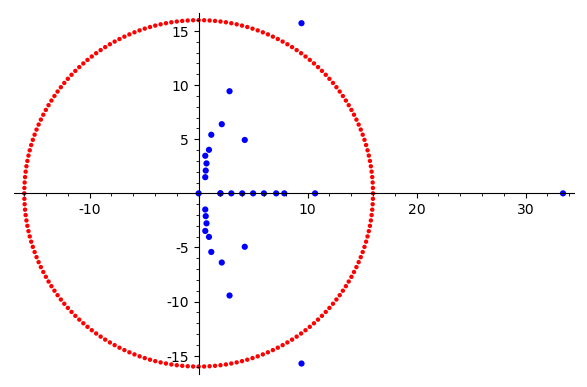

polynomial  16  degree:  45  good-root count:  42   root count:  45
polynomial # 17


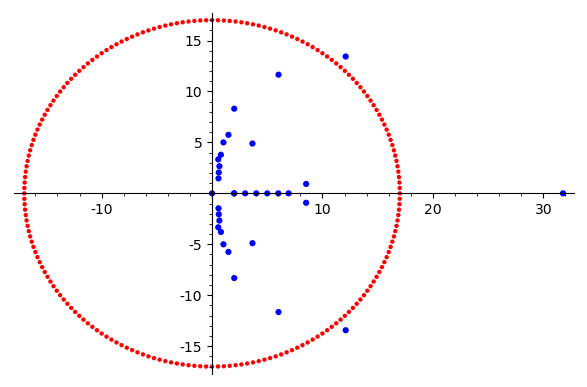

polynomial  17  degree:  48  good-root count:  45   root count:  48
polynomial # 18


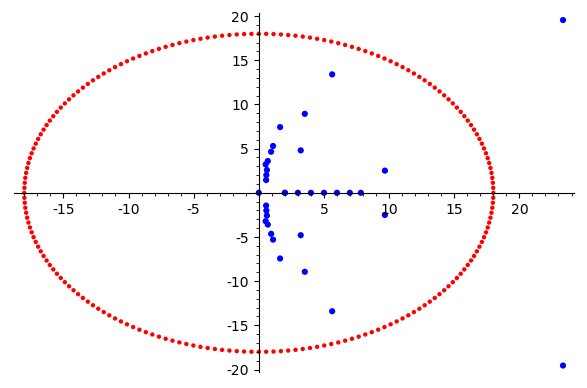

polynomial  18  degree:  51  good-root count:  49   root count:  51
polynomial # 19


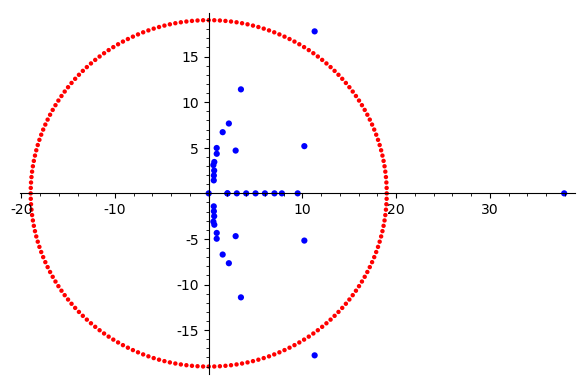

polynomial  19  degree:  54  good-root count:  51   root count:  54
polynomial # 20


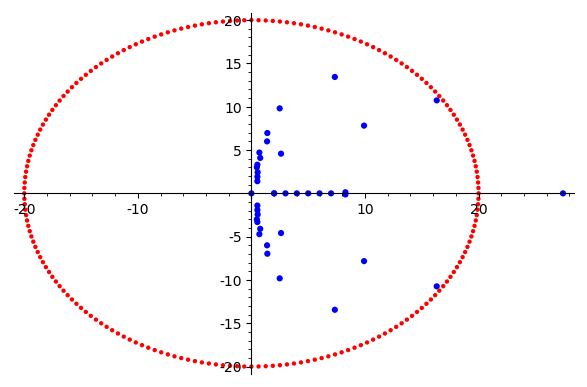

polynomial  20  degree:  57  good-root count:  56   root count:  57
polynomial # 21


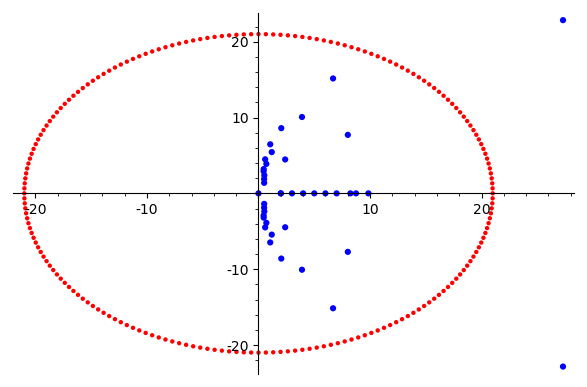

polynomial  21  degree:  60  good-root count:  58   root count:  60
polynomial # 22


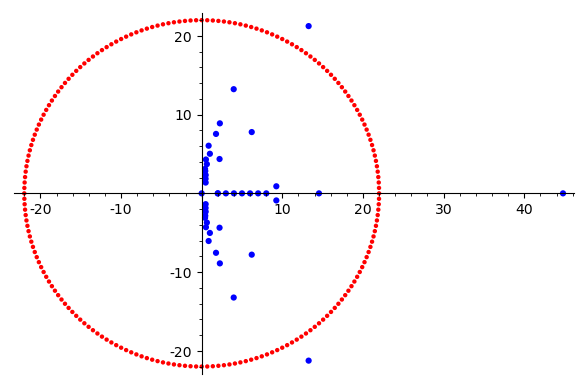

polynomial  22  degree:  63  good-root count:  60   root count:  63
polynomial # 23


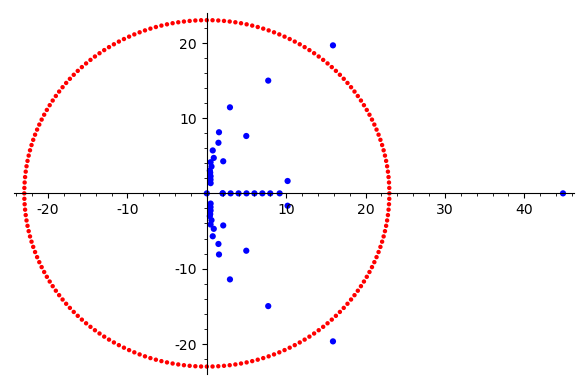

polynomial  23  degree:  66  good-root count:  63   root count:  66
polynomial # 24


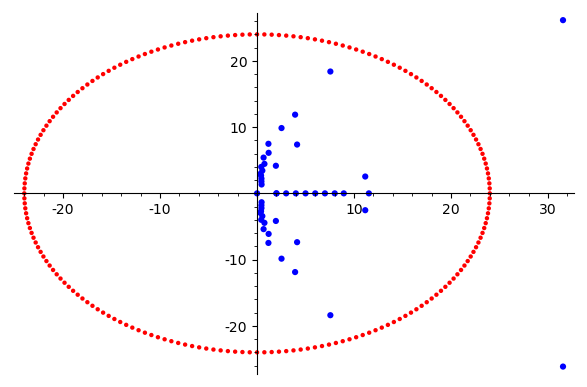

polynomial  24  degree:  69  good-root count:  67   root count:  69
polynomial # 25


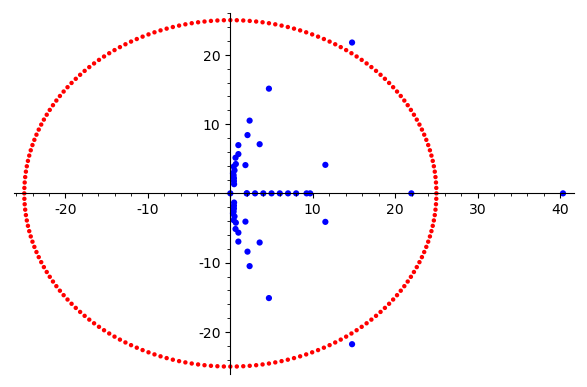

polynomial  25  degree:  72  good-root count:  69   root count:  72
polynomial # 26


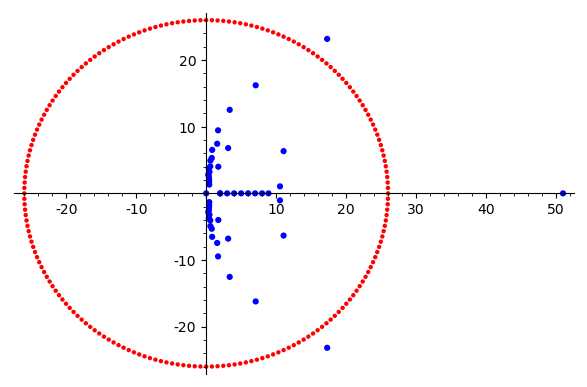

polynomial  26  degree:  75  good-root count:  72   root count:  75
polynomial # 27


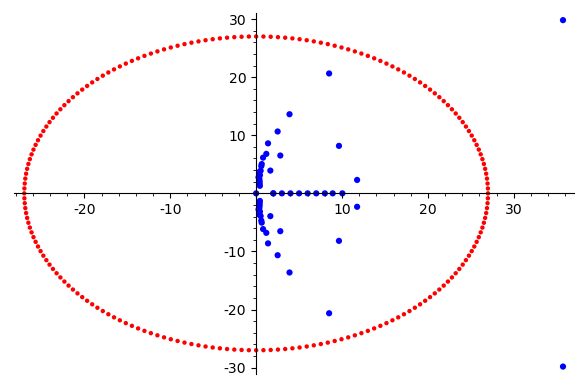

polynomial  27  degree:  78  good-root count:  76   root count:  78
polynomial # 28


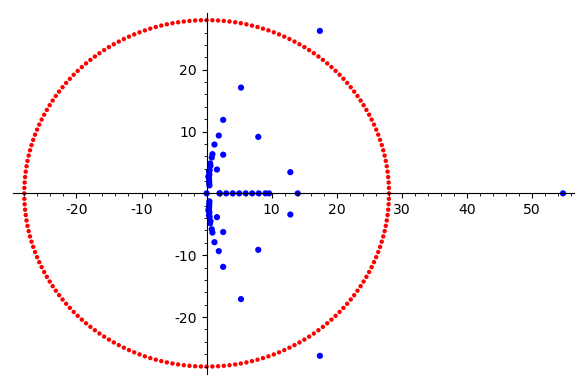

polynomial  28  degree:  81  good-root count:  78   root count:  81
polynomial # 29


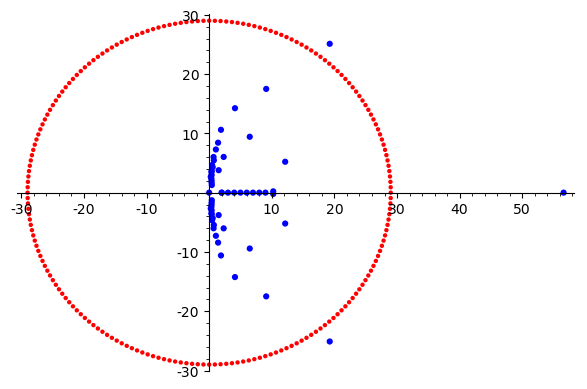

polynomial  29  degree:  84  good-root count:  81   root count:  84
polynomial # 30


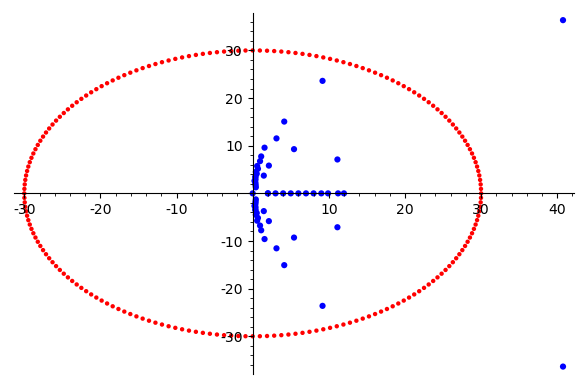

polynomial  30  degree:  87  good-root count:  85   root count:  87
polynomial # 31


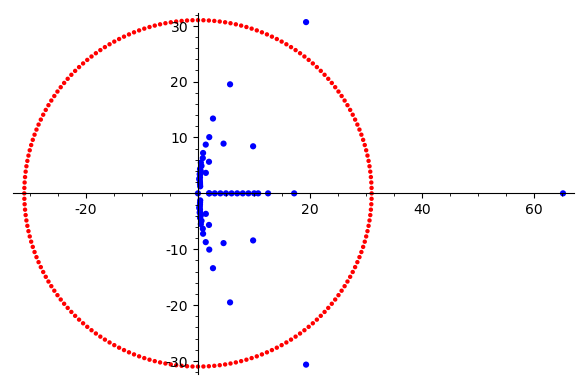

polynomial  31  degree:  90  good-root count:  87   root count:  90
polynomial # 32


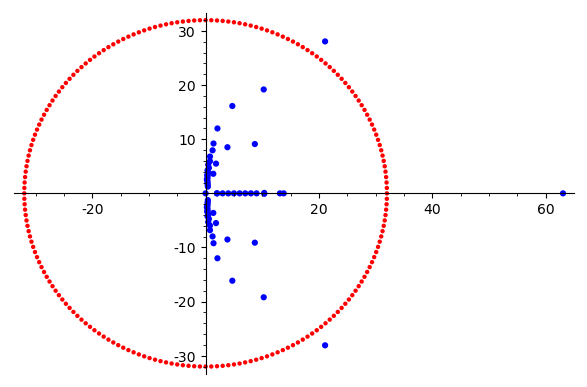

polynomial  32  degree:  93  good-root count:  90   root count:  93
polynomial # 33


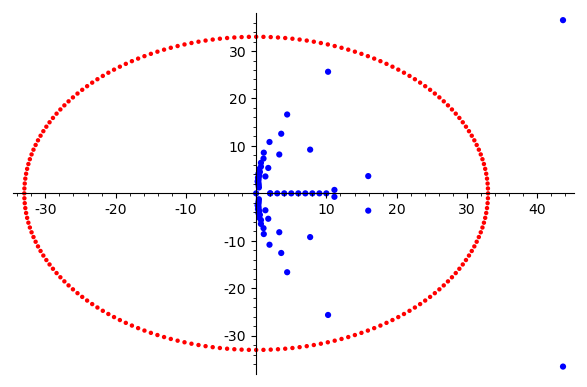

polynomial  33  degree:  96  good-root count:  94   root count:  96
polynomial # 34


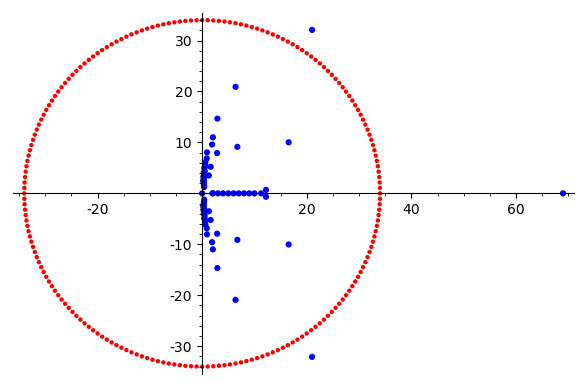

polynomial  34  degree:  99  good-root count:  96   root count:  99
polynomial # 35


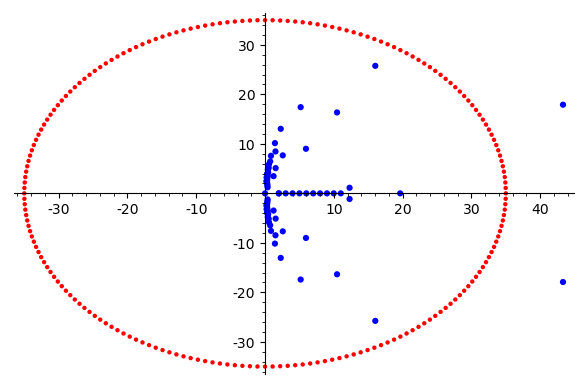

polynomial  35  degree:  102  good-root count:  100   root count:  102
polynomial # 36


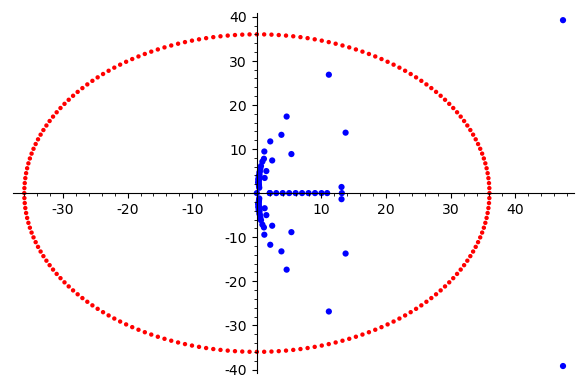

polynomial  36  degree:  105  good-root count:  103   root count:  105
polynomial # 37


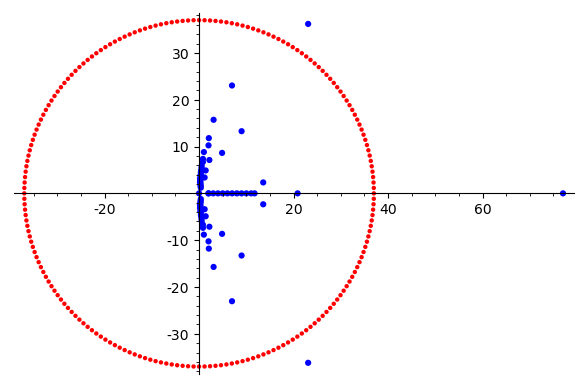

polynomial  37  degree:  108  good-root count:  105   root count:  108
polynomial # 38


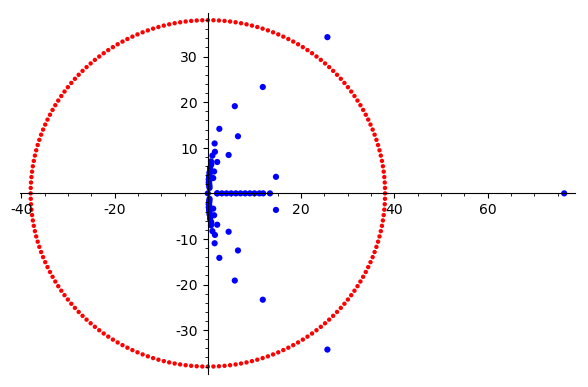

polynomial  38  degree:  111  good-root count:  108   root count:  111
polynomial # 39


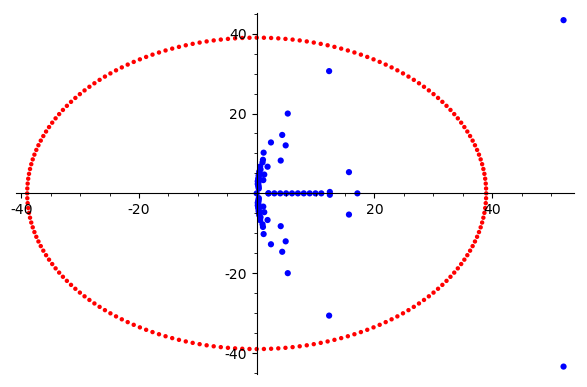

polynomial  39  degree:  114  good-root count:  112   root count:  114
polynomial # 40


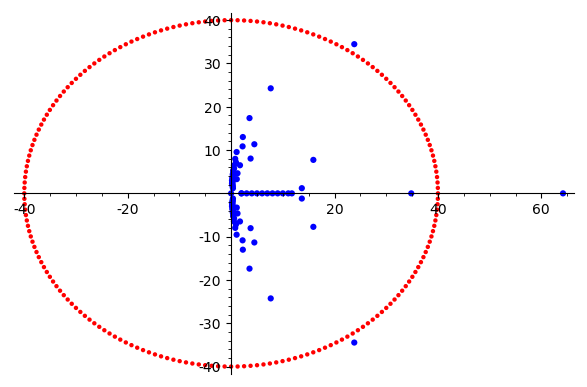

polynomial  40  degree:  117  good-root count:  114   root count:  117
polynomial # 41


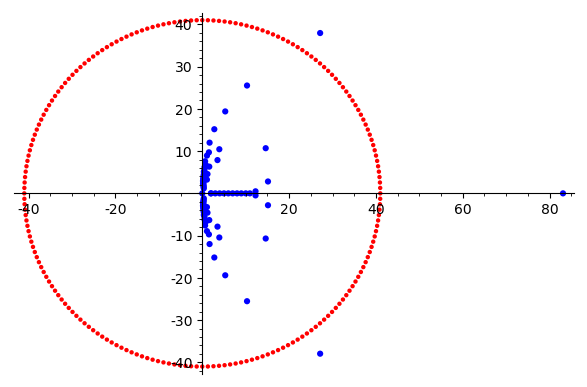

polynomial  41  degree:  120  good-root count:  117   root count:  120
polynomial # 42


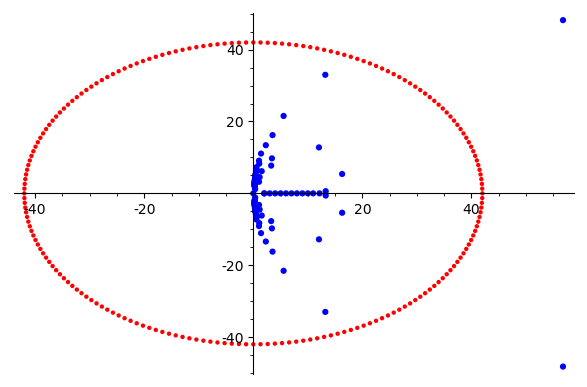

polynomial  42  degree:  123  good-root count:  121   root count:  123
polynomial # 43


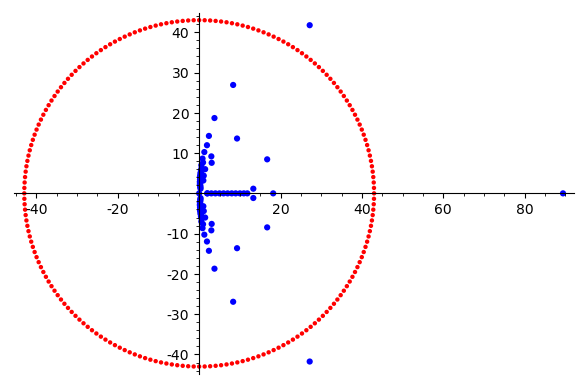

polynomial  43  degree:  126  good-root count:  123   root count:  126
polynomial # 44


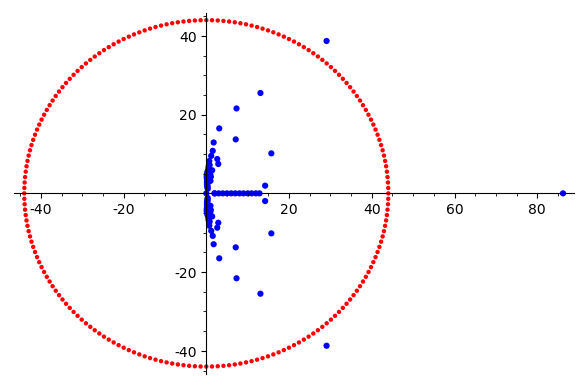

polynomial  44  degree:  129  good-root count:  126   root count:  129
polynomial # 45


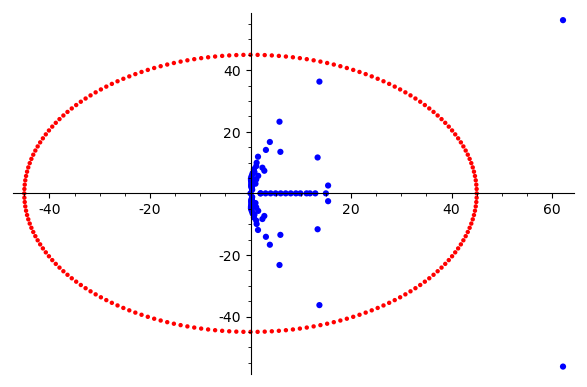

polynomial  45  degree:  132  good-root count:  130   root count:  132
polynomial # 46


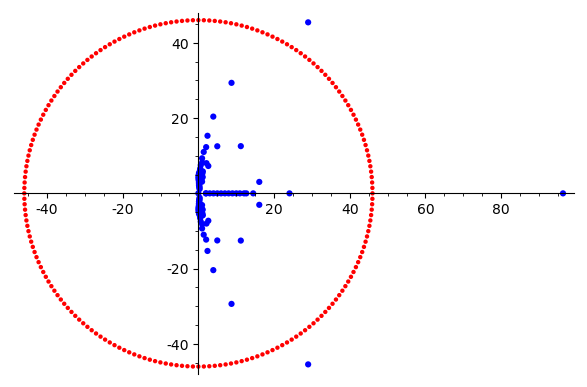

polynomial  46  degree:  135  good-root count:  132   root count:  135
polynomial # 47


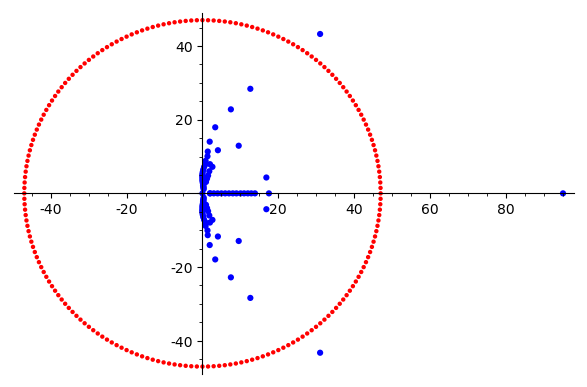

polynomial  47  degree:  138  good-root count:  135   root count:  138
polynomial # 48


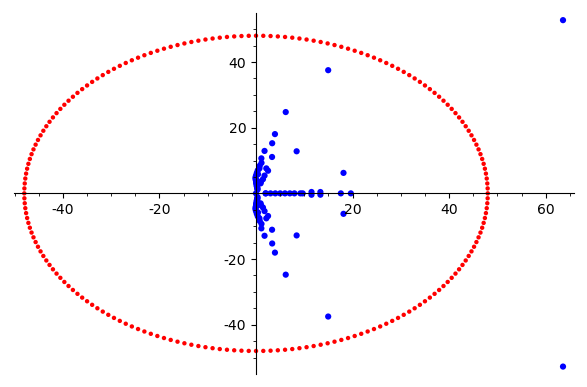

polynomial  48  degree:  141  good-root count:  139   root count:  141
polynomial # 49


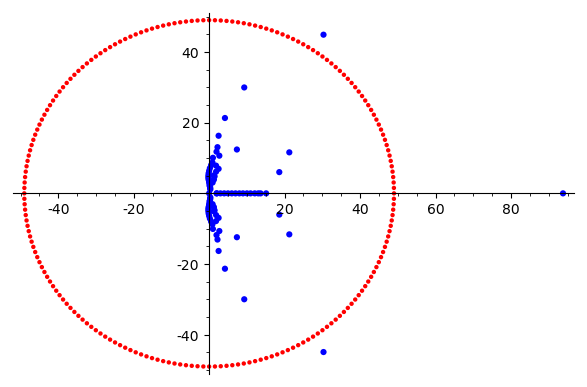

polynomial  49  degree:  144  good-root count:  141   root count:  144
polynomial # 50


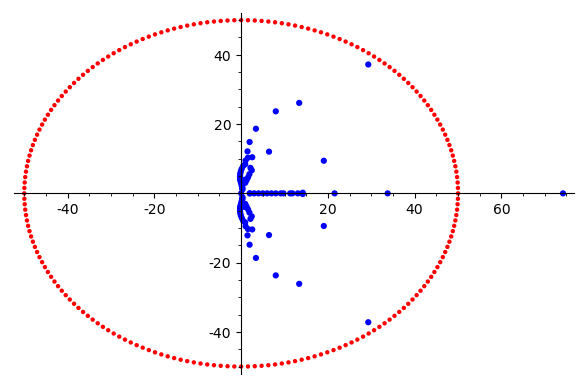

polynomial  50  degree:  147  good-root count:  146   root count:  147
***************************************************************************************
 discrepancies: 
[[2, 2], [3, 2], [4, 1], [5, 3], [6, 2], [7, 1], [8, 3], [9, 2], [10, 3], [11, 3], [12, 2], [13, 3], [14, 3], [15, 2], [16, 3], [17, 3], [18, 2], [19, 3], [20, 1], [21, 2], [22, 3], [23, 3], [24, 2], [25, 3], [26, 3], [27, 2], [28, 3], [29, 3], [30, 2], [31, 3], [32, 3], [33, 2], [34, 3], [35, 2], [36, 2], [37, 3], [38, 3], [39, 2], [40, 3], [41, 3], [42, 2], [43, 3], [44, 3], [45, 2], [46, 3], [47, 3], [48, 2], [49, 3], [50, 1]]


In [46]:
import pickle
rfile = open('/Users/barrybrent/22mar21no2.txt','r')  # interpolating polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
discrepancies=[]
for k in [0..49]:
    print "====================================================================================="
    points=[]
    n=s[k][0]
    nl=R(n)
    print "polynomial #",n
    poly=R(s[k][1])
    pr=poly.roots(CC)
    lpr=len(pr)
    roots=[]
    rootcount=0
    goodpoints=[]
    goodrootcount=0
    for j in [0..lpr-1]:
        rootpair=pr[j]
        (root,mult)=rootpair
        roots=roots+[root]
        rootcount=rootcount+mult
        if absoluteValue(root,10)<nl:
            goodrootcount=goodrootcount+mult
    rootplot=list_plot(roots,color='blue',size=20)
    circlepoints=[]
    for a in [0..199]:
        theta=(a/200)*(2*pi)
        point=[nl*cos(theta),nl*sin(theta)]
        circlepoints=circlepoints+[point]
    circle=list_plot(circlepoints,color='red')
    show(rootplot+circle)
    pd=poly.degree();rc=rootcount;grc=goodrootcount
    if pd>grc:discrepancies=discrepancies+[[n,pd-grc]]
    print "polynomial ",n," degree: ",pd," good-root count: ",grc,"  root count: ",rc
print "***************************************************************************************"
print " discrepancies: "
if len(discrepancies)==0:print "none"
if len(discrepancies)>0:print(discrepancies)

4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


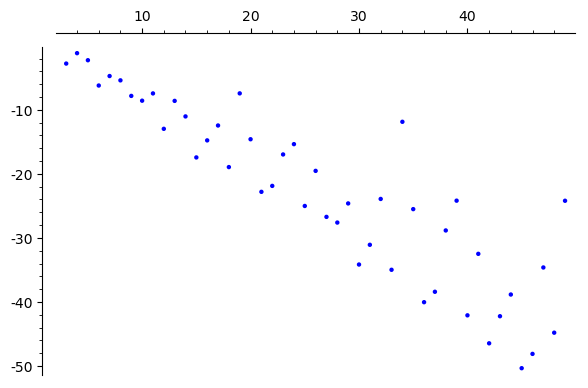

In [48]:
import pickle
rfile = open('/Users/barrybrent/22mar21no2.txt','r')  # interpolating polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
maxes=[]
for k in [3..len(s)-1]:
    abroots=[]
    n=s[k][0]
    bound=R(n)
    print(n)
    poly=R(s[k][1])
    pr=poly.roots(CC)
    for j in [0..len(pr)-1]:
        rootpair=pr[j]
        (root,mult)=rootpair
        abroots=abroots+[bound-absoluteValue(root,10)]
    maxes=maxes+[[k,min(abroots)]] 
show(list_plot(maxes,color='blue'))

4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


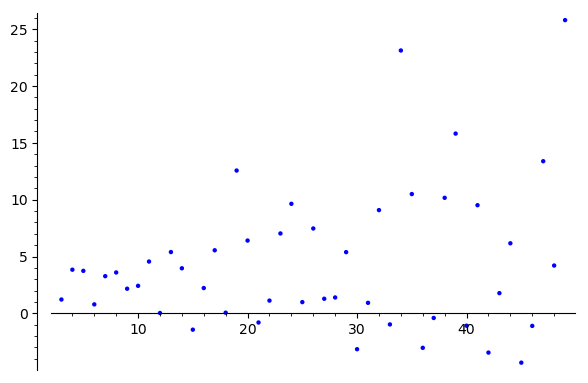

In [49]:
import pickle
rfile = open('/Users/barrybrent/22mar21no2.txt','r')  # interpolating polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
maxes=[]
for k in [3..len(s)-1]:
    abroots=[]
    n=s[k][0]
    bound=2*R(n)
    print(n)
    poly=R(s[k][1])
    pr=poly.roots(CC)
    for j in [0..len(pr)-1]:
        rootpair=pr[j]
        (root,mult)=rootpair
        abroots=abroots+[bound-absoluteValue(root,10)]
    maxes=maxes+[[k,min(abroots)]] 
show(list_plot(maxes,color='blue'))

4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


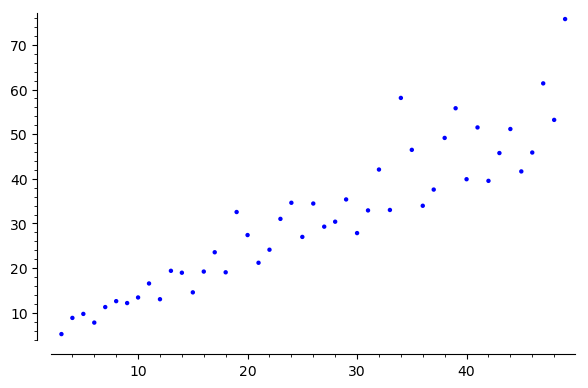

In [50]:
import pickle
rfile = open('/Users/barrybrent/22mar21no2.txt','r')  # interpolating polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
maxes=[]
for k in [3..len(s)-1]:
    abroots=[]
    n=s[k][0]
    bound=3*R(n)
    print(n)
    poly=R(s[k][1])
    pr=poly.roots(CC)
    for j in [0..len(pr)-1]:
        rootpair=pr[j]
        (root,mult)=rootpair
        abroots=abroots+[bound-absoluteValue(root,10)]
    maxes=maxes+[[k,min(abroots)]] 
show(list_plot(maxes,color='blue'))

polynomial # 1


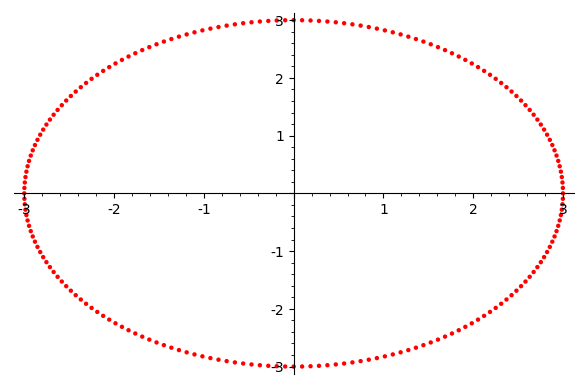

polynomial  1  degree:  0  good-root count:  0   root count:  0
polynomial # 2


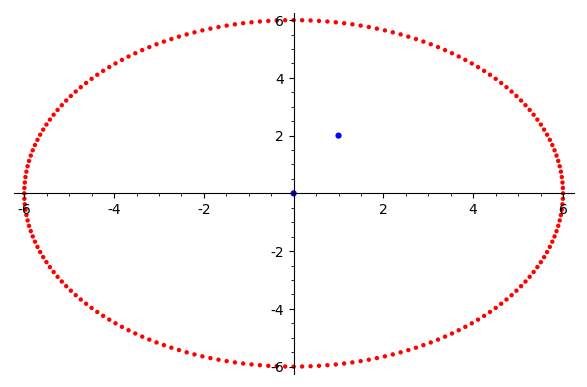

polynomial  2  degree:  3  good-root count:  3   root count:  3
polynomial # 3


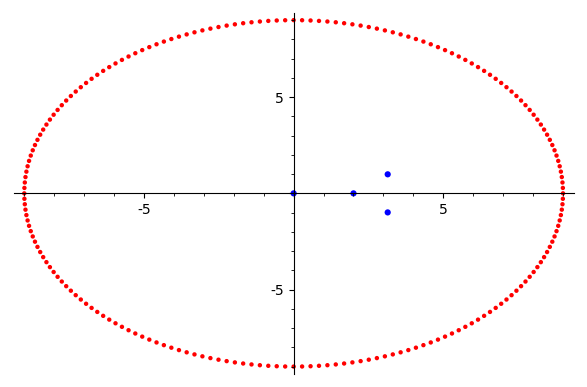

polynomial  3  degree:  6  good-root count:  6   root count:  6
polynomial # 4


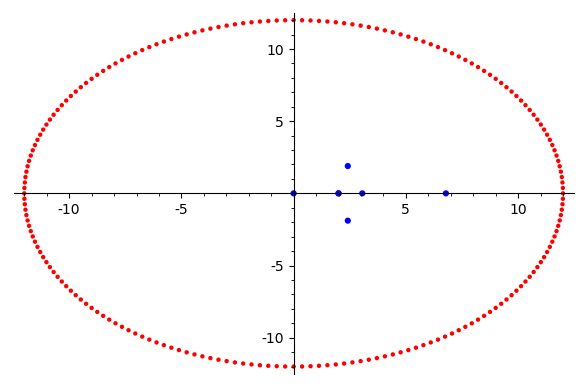

polynomial  4  degree:  9  good-root count:  9   root count:  9
polynomial # 5


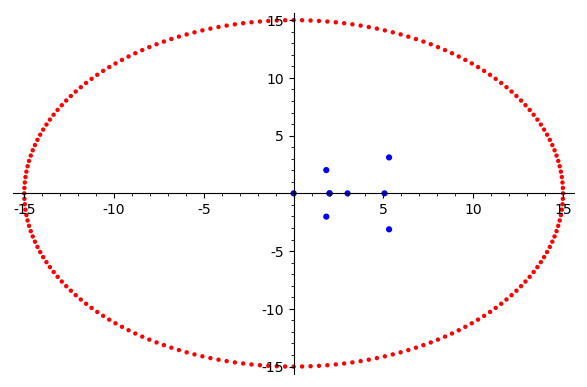

polynomial  5  degree:  12  good-root count:  12   root count:  12
polynomial # 6


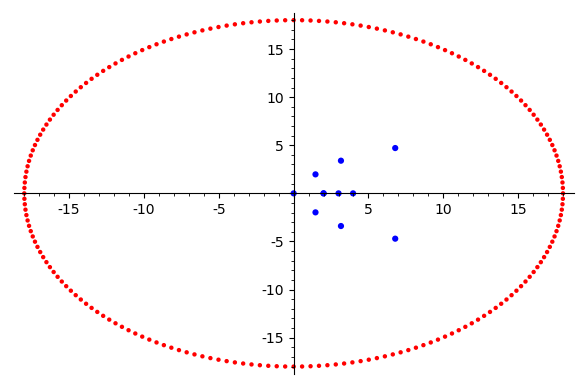

polynomial  6  degree:  15  good-root count:  15   root count:  15
polynomial # 7


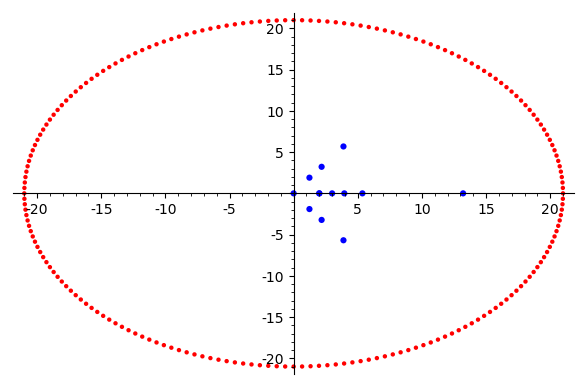

polynomial  7  degree:  18  good-root count:  18   root count:  18
polynomial # 8


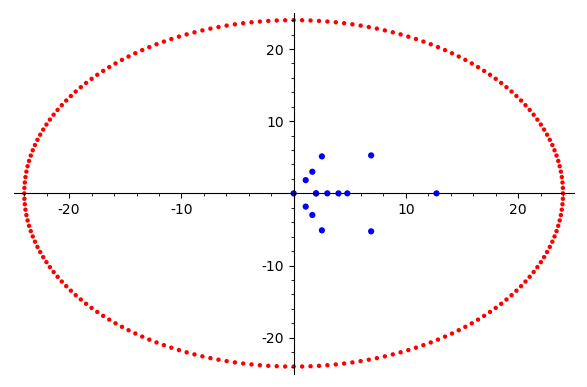

polynomial  8  degree:  21  good-root count:  21   root count:  21
polynomial # 9


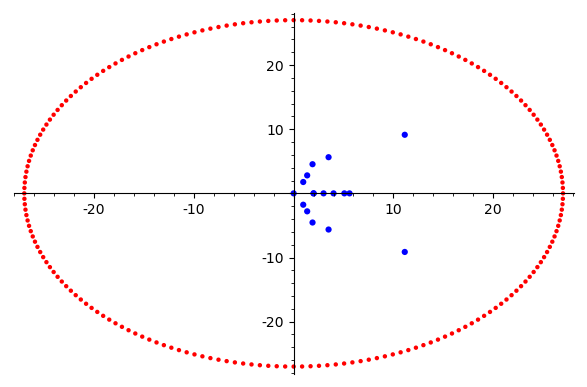

polynomial  9  degree:  24  good-root count:  24   root count:  24
polynomial # 10


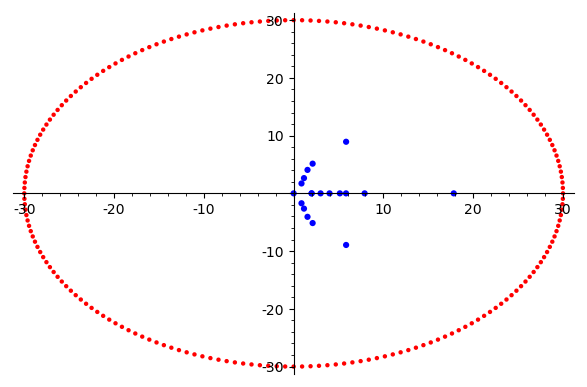

polynomial  10  degree:  27  good-root count:  27   root count:  27
polynomial # 11


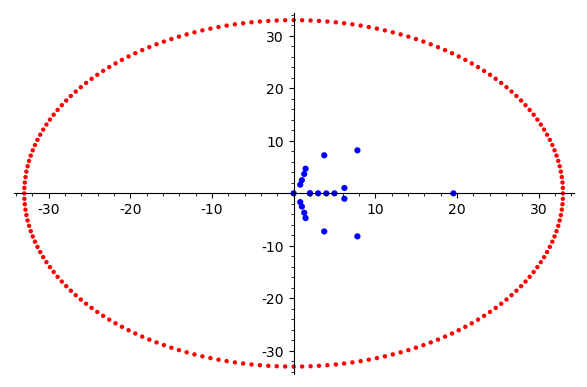

polynomial  11  degree:  30  good-root count:  30   root count:  30
polynomial # 12


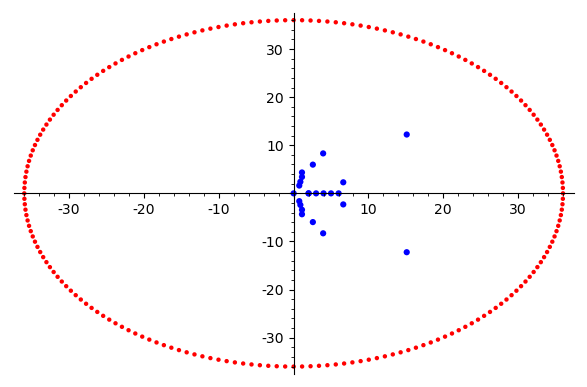

polynomial  12  degree:  33  good-root count:  33   root count:  33
polynomial # 13


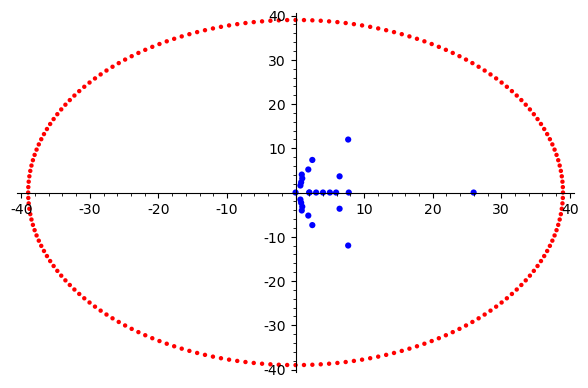

polynomial  13  degree:  36  good-root count:  36   root count:  36
polynomial # 14


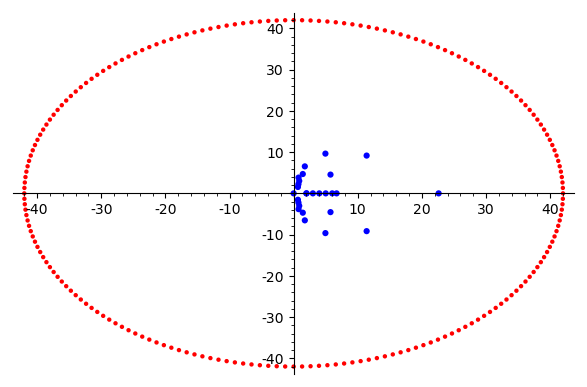

polynomial  14  degree:  39  good-root count:  39   root count:  39
polynomial # 15


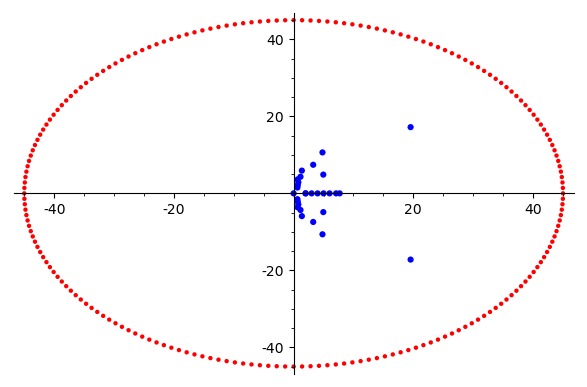

polynomial  15  degree:  42  good-root count:  42   root count:  42
polynomial # 16


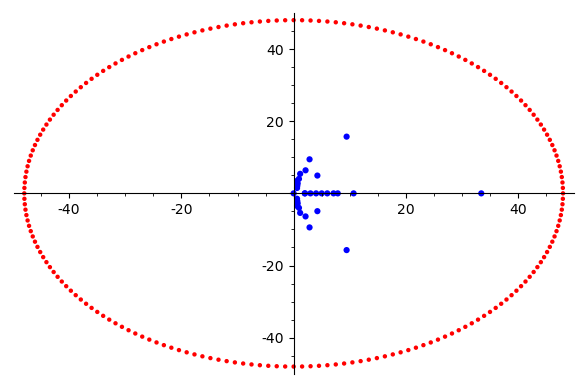

polynomial  16  degree:  45  good-root count:  45   root count:  45
polynomial # 17


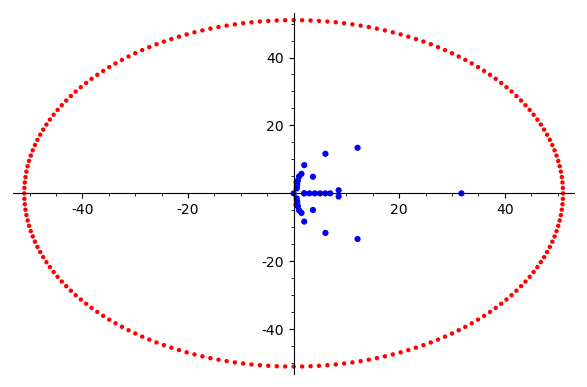

polynomial  17  degree:  48  good-root count:  48   root count:  48
polynomial # 18


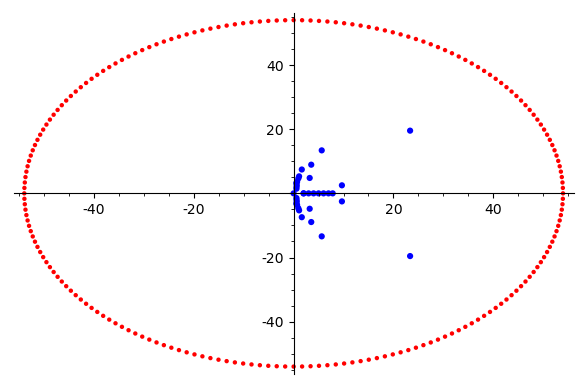

polynomial  18  degree:  51  good-root count:  51   root count:  51
polynomial # 19


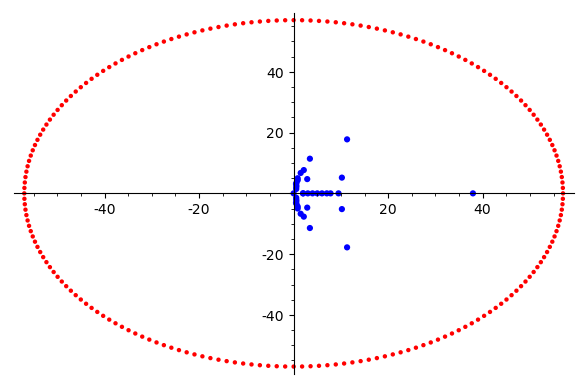

polynomial  19  degree:  54  good-root count:  54   root count:  54
polynomial # 20


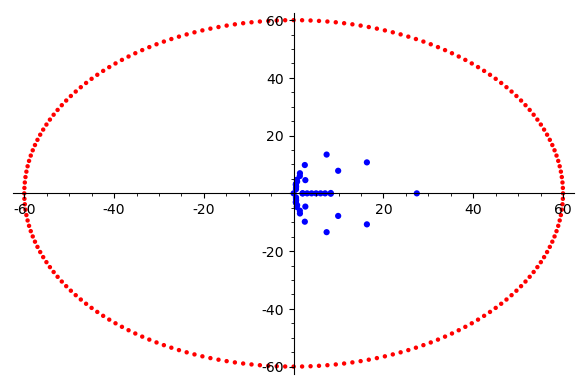

polynomial  20  degree:  57  good-root count:  57   root count:  57
polynomial # 21


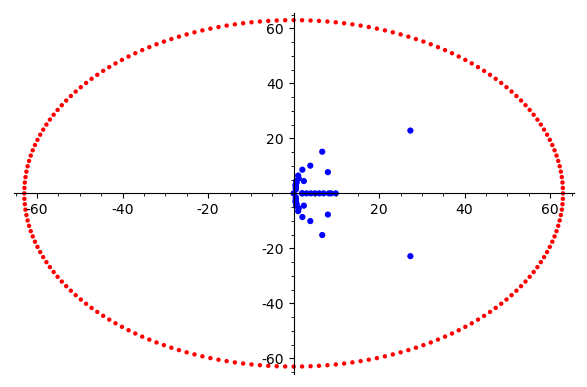

polynomial  21  degree:  60  good-root count:  60   root count:  60
polynomial # 22


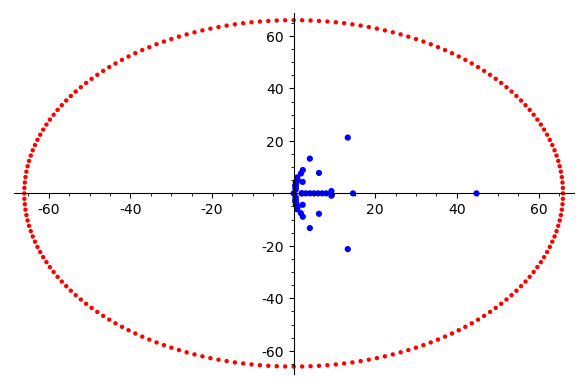

polynomial  22  degree:  63  good-root count:  63   root count:  63
polynomial # 23


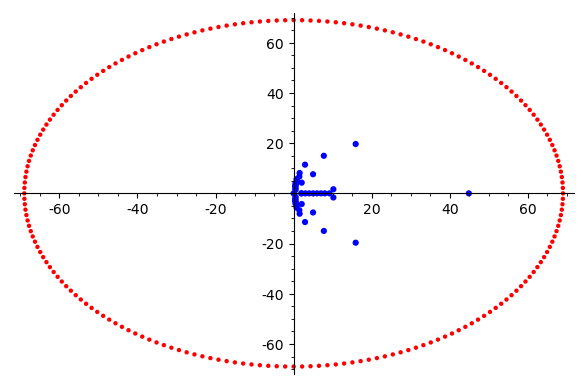

polynomial  23  degree:  66  good-root count:  66   root count:  66
polynomial # 24


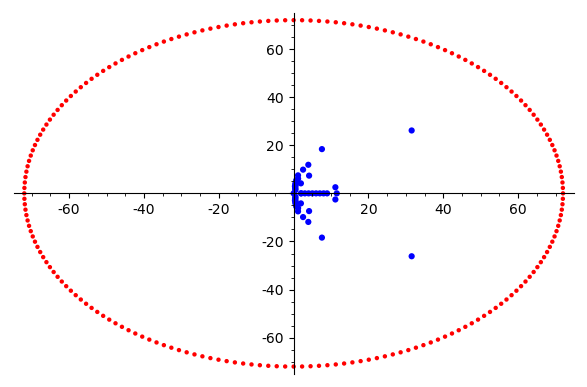

polynomial  24  degree:  69  good-root count:  69   root count:  69
polynomial # 25


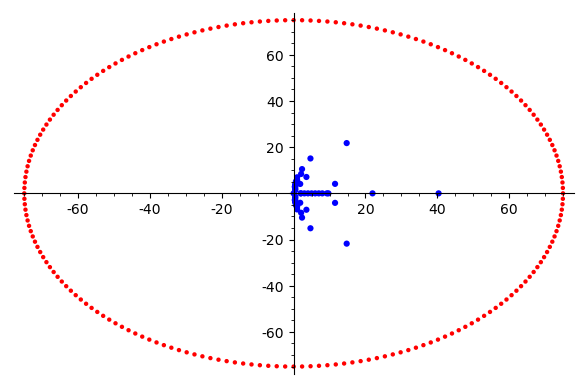

polynomial  25  degree:  72  good-root count:  72   root count:  72
polynomial # 26


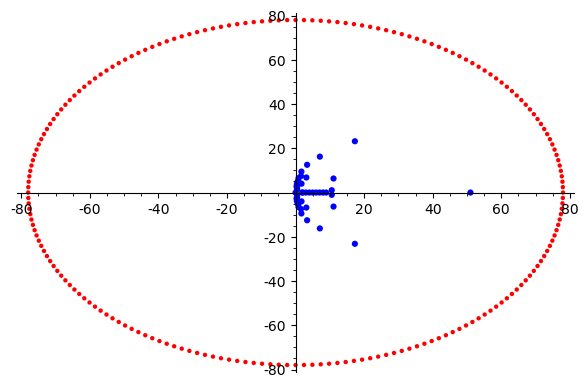

polynomial  26  degree:  75  good-root count:  75   root count:  75
polynomial # 27


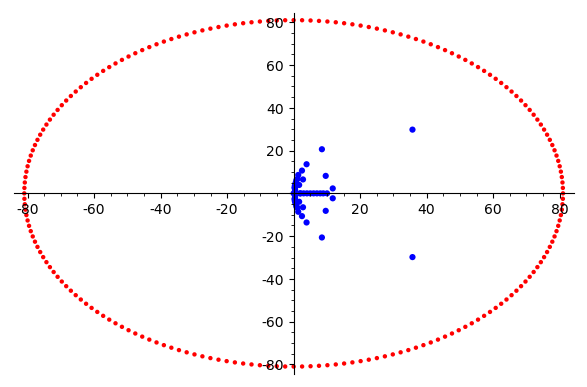

polynomial  27  degree:  78  good-root count:  78   root count:  78
polynomial # 28


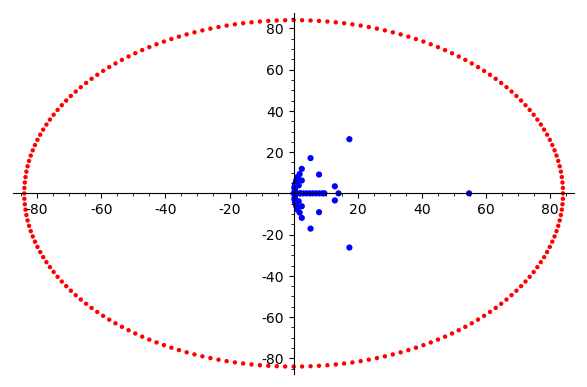

polynomial  28  degree:  81  good-root count:  81   root count:  81
polynomial # 29


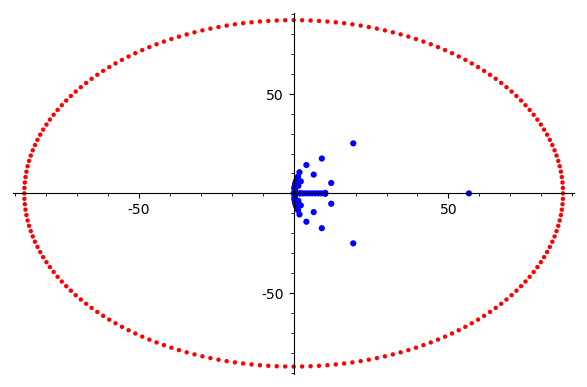

polynomial  29  degree:  84  good-root count:  84   root count:  84
polynomial # 30


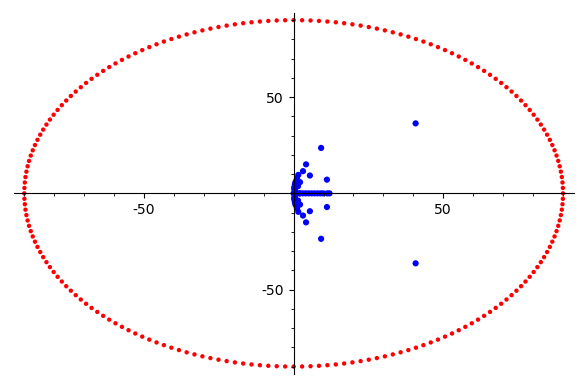

polynomial  30  degree:  87  good-root count:  87   root count:  87
polynomial # 31


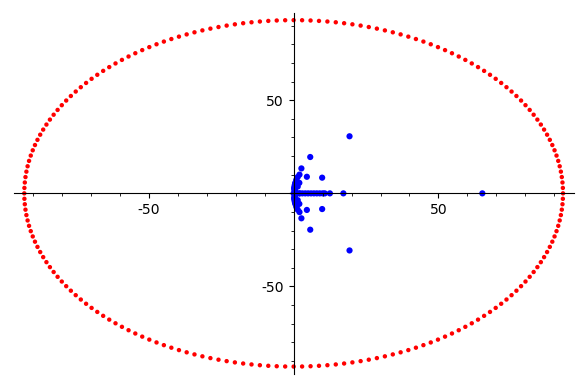

polynomial  31  degree:  90  good-root count:  90   root count:  90
polynomial # 32


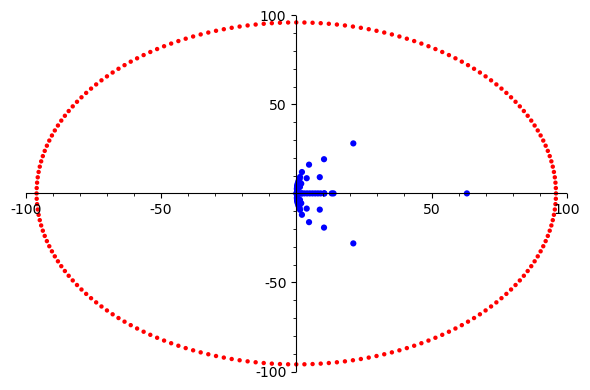

polynomial  32  degree:  93  good-root count:  93   root count:  93
polynomial # 33


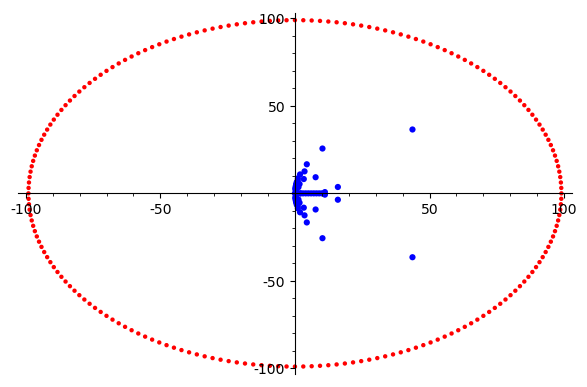

polynomial  33  degree:  96  good-root count:  96   root count:  96
polynomial # 34


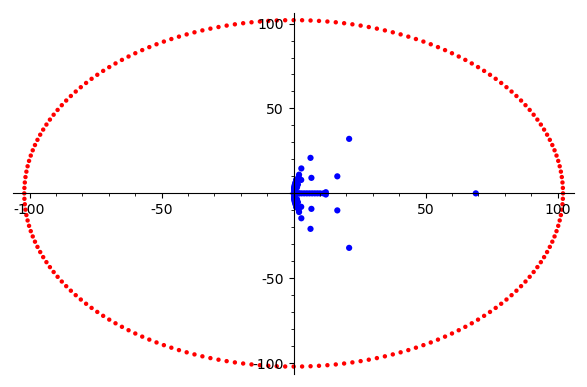

polynomial  34  degree:  99  good-root count:  99   root count:  99
polynomial # 35


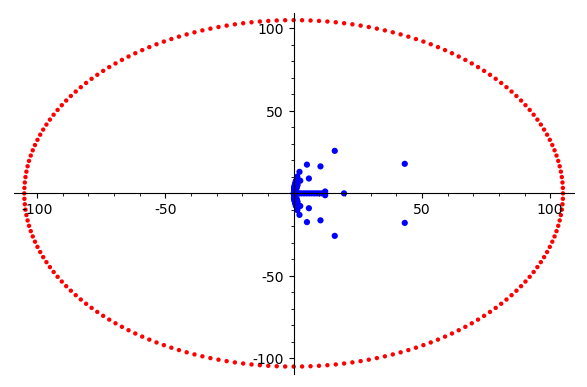

polynomial  35  degree:  102  good-root count:  102   root count:  102
polynomial # 36


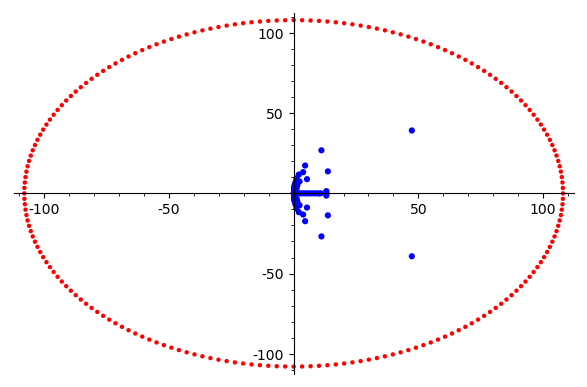

polynomial  36  degree:  105  good-root count:  105   root count:  105
polynomial # 37


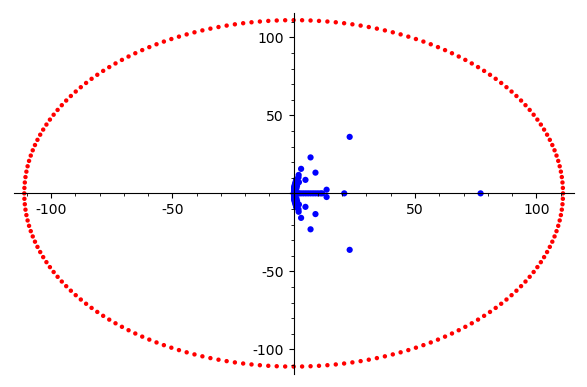

polynomial  37  degree:  108  good-root count:  108   root count:  108
polynomial # 38


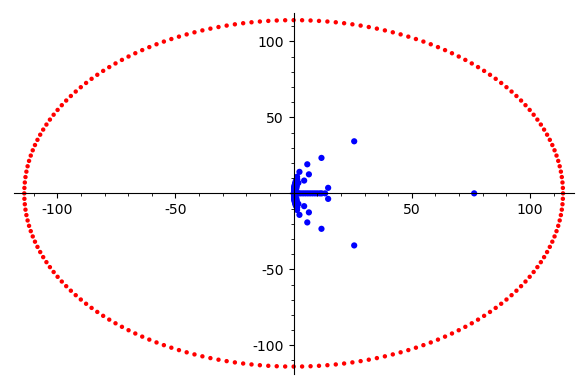

polynomial  38  degree:  111  good-root count:  111   root count:  111
polynomial # 39


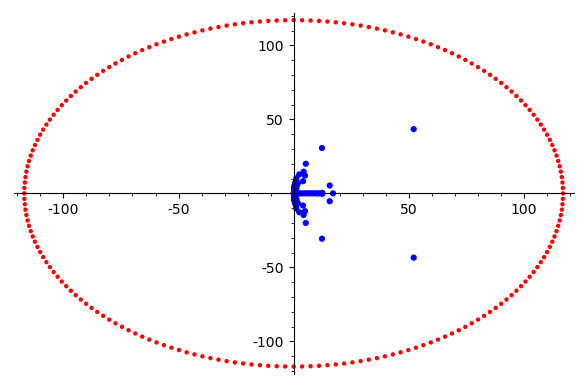

polynomial  39  degree:  114  good-root count:  114   root count:  114
polynomial # 40


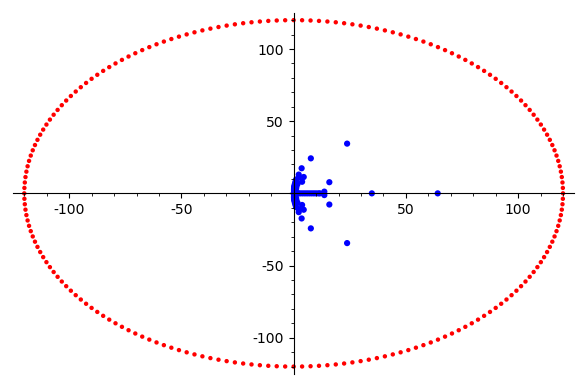

polynomial  40  degree:  117  good-root count:  117   root count:  117
polynomial # 41


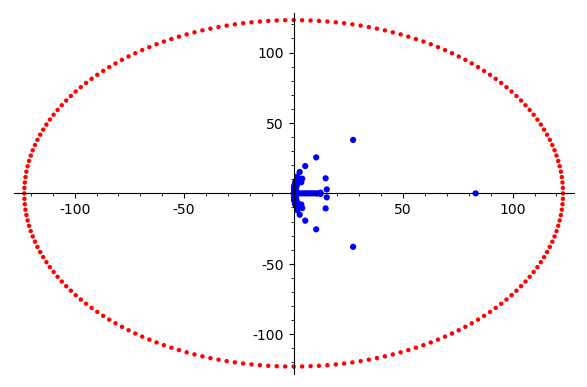

polynomial  41  degree:  120  good-root count:  120   root count:  120
polynomial # 42


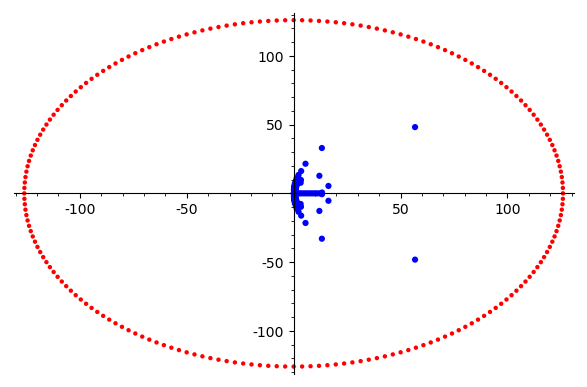

polynomial  42  degree:  123  good-root count:  123   root count:  123
polynomial # 43


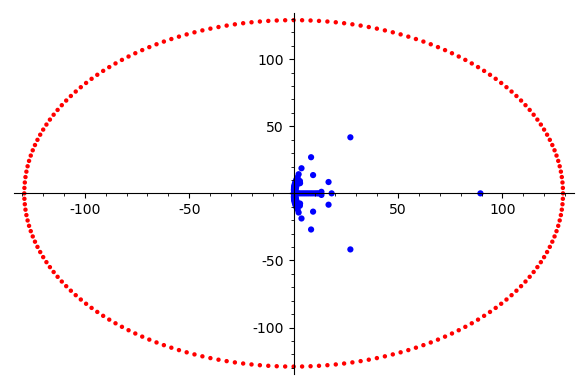

polynomial  43  degree:  126  good-root count:  126   root count:  126
polynomial # 44


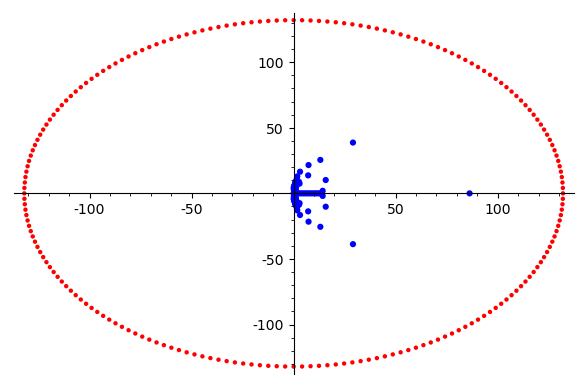

polynomial  44  degree:  129  good-root count:  129   root count:  129
polynomial # 45


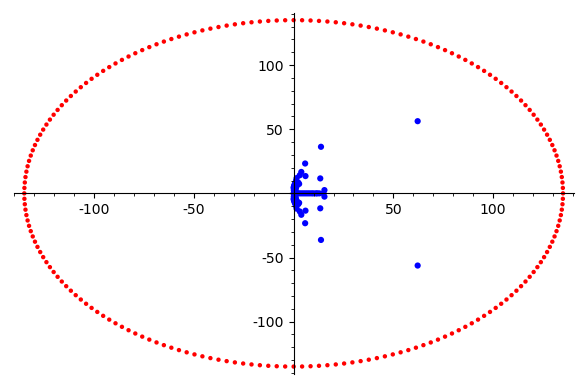

polynomial  45  degree:  132  good-root count:  132   root count:  132
polynomial # 46


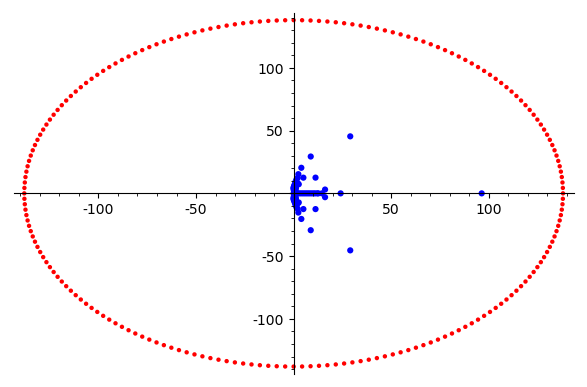

polynomial  46  degree:  135  good-root count:  135   root count:  135
polynomial # 47


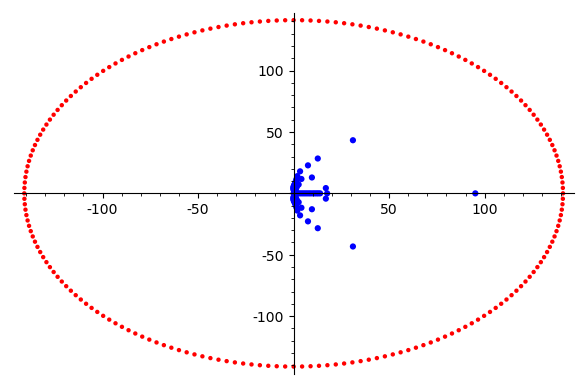

polynomial  47  degree:  138  good-root count:  138   root count:  138
polynomial # 48


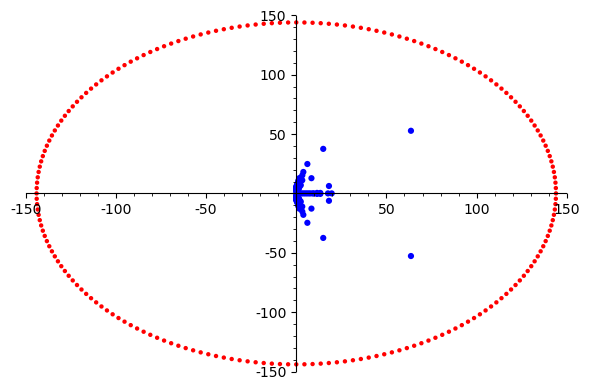

polynomial  48  degree:  141  good-root count:  141   root count:  141
polynomial # 49


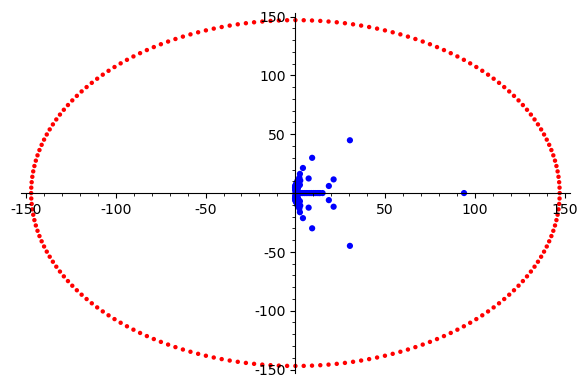

polynomial  49  degree:  144  good-root count:  144   root count:  144
polynomial # 50


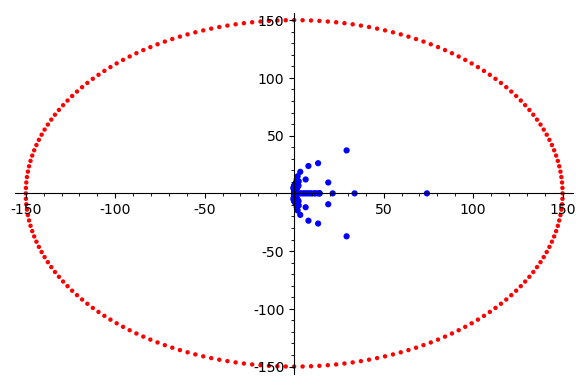

polynomial  50  degree:  147  good-root count:  147   root count:  147
***************************************************************************************
 discrepancies: 
none


In [51]:
import pickle
rfile = open('/Users/barrybrent/22mar21no2.txt','r')  # interpolating polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
discrepancies=[]
for k in [0..49]:
    print "====================================================================================="
    points=[]
    n=s[k][0]
    nl=R(3*n)
    print "polynomial #",n
    poly=R(s[k][1])
    pr=poly.roots(CC)
    lpr=len(pr)
    roots=[]
    rootcount=0
    goodpoints=[]
    goodrootcount=0
    for j in [0..lpr-1]:
        rootpair=pr[j]
        (root,mult)=rootpair
        roots=roots+[root]
        rootcount=rootcount+mult
        if absoluteValue(root,10)<nl:
            goodrootcount=goodrootcount+mult
    rootplot=list_plot(roots,color='blue',size=20)
    circlepoints=[]
    for a in [0..199]:
        theta=(a/200)*(2*pi)
        point=[nl*cos(theta),nl*sin(theta)]
        circlepoints=circlepoints+[point]
    circle=list_plot(circlepoints,color='red')
    show(rootplot+circle)
    pd=poly.degree();rc=rootcount;grc=goodrootcount
    if pd>grc:discrepancies=discrepancies+[[n,pd-grc]]
    print "polynomial ",n," degree: ",pd," good-root count: ",grc,"  root count: ",rc
print "***************************************************************************************"
print " discrepancies: "
if len(discrepancies)==0:print "none"
if len(discrepancies)>0:print(discrepancies)